/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mean Squared Error: 0.0
R^2 Score: 1.0
Coefficients: [5000.]
Intercept: 35000.0


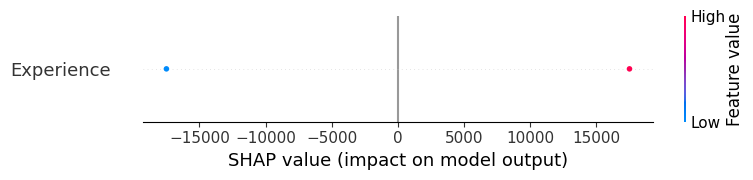

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Sample data
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]
}

df = pd.DataFrame(data)

# Features and target
X = df[['Experience']]
y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Interpretation with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())
